In [6]:
import numpy as np 
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from wordcloud import WordCloud  # Used to check the most common words from each class

In [39]:
data = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [40]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [42]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
data.columns = ['label','email']

In [44]:
data.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
data['label'].replace({'ham':0,'spam':1},inplace=True)

In [47]:
data.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
X = data['email']
y = data['label']

In [49]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [50]:
vectorizer = CountVectorizer(encoding="ignore")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [51]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [52]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [53]:
print("F1_score test : ",f1_score(y_test,y_pred_test))
print("F1_score train: ",f1_score(y_train,y_pred_train))

F1_score test :  0.948529411764706
F1_score train:  0.9760528488852189


In [54]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


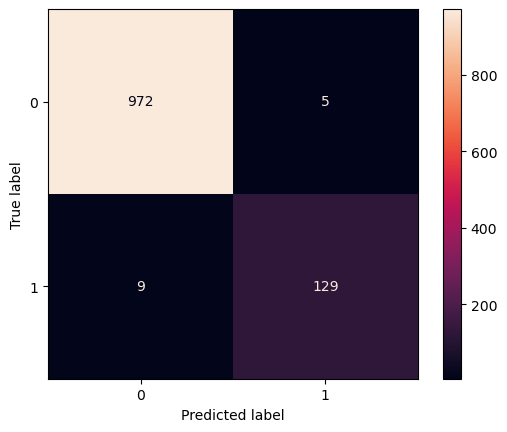

In [55]:
plot_confusion_matrix(clf,X_test,y_test,cmap="rocket")

In [56]:
# Working pretty Good

In [57]:
# Let's see the most common words containing the spam or ham class

In [64]:
def visualize(label):
    words = " "
    for msg in data[data['label'] == label]['email']:
        msg = msg.lower()
        words+=msg + " "
    wordcloud = WordCloud(width=600,height=400).generate(words)
    
    plt.imshow(wordcloud)
    plt.show()

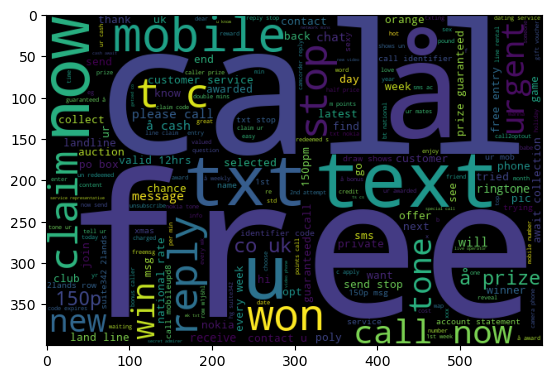

In [65]:
visualize(1)

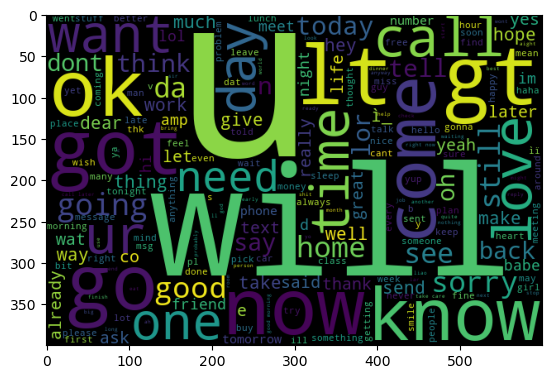

In [66]:
visualize(0)

In [69]:
# Lets see where did the model fail

In [70]:
X = vectorizer.transform(data['email'])
data['predictions'] = clf.predict(X)

In [86]:
# Actually spam but predicted ham
sneaky_spam = data[(data['label'] == 1) & (data['predictions'] == 0)]['email']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe x u 4goten bout me?' scammers g

In [91]:
# Actually ham but predicted spam
actually_not_spam = data[(data['label'] == 0) & (data['predictions'] == 1)]['email']
for msg in actually_not_spam:
    print(msg)

No calls..messages..missed calls
No calls..messages..missed calls
Waiting for your call.
26th OF JULY
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
No calls..messages..missed calls
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us


In [92]:
# Thats Pretty intersting